In [1]:
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer
from pathlib import Path
import nltk
from nltk.corpus import stopwords
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from pathlib import Path
import imageio
from wordcloud import WordCloud
from PIL import Image

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nvhab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stops = stopwords.words('english')
sorted(stops)

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:
path_text = Path('pokerface.txt').read_text()
song_lyrics = TextBlob(Path('pokerface.txt').read_text())

In [5]:
lyrics = song_lyrics.word_counts.items()
#### if error on word_counts.lyrics() -> change to word_counts.items()
lyrics

dict_items([('tell', 2), ('me', 2), ('somethin', 2), ('girl', 1), ('are', 2), ('you', 5), ('happy', 1), ('in', 13), ('this', 1), ('modern', 1), ('world', 1), ('or', 2), ('do', 2), ('need', 2), ('more', 2), ('is', 1), ('there', 1), ('else', 1), ('re', 5), ('searchin', 1), ('for', 3), ('i', 12), ('m', 4), ('falling', 2), ('all', 2), ('the', 20), ('good', 2), ('times', 4), ('find', 2), ('myself', 4), ('longin', 1), ('change', 2), ('and', 2), ('bad', 2), ('fear', 2), ('something', 1), ('boy', 1), ("n't", 4), ('tired', 1), ('tryin', 1), ('to', 1), ('fill', 1), ('that', 1), ('void', 1), ('ai', 1), ('it', 2), ('hard', 1), ('keeping', 1), ('so', 1), ('hardcore', 1), ('longing', 1), ('a', 1), ('off', 2), ('deep', 2), ('end', 2), ('watch', 2), ('as', 2), ('dive', 2), ('ll', 2), ('never', 2), ('meet', 2), ('ground', 2), ('crash', 2), ('through', 2), ('surface', 2), ('where', 2), ('they', 2), ('ca', 2), ('hurt', 2), ('us', 2), ('we', 4), ('far', 4), ('from', 4), ('shallow', 16), ('now', 4), ('oh',

In [6]:
lyrics = [lyric for lyric in lyrics if lyric[0] not in stops]

In [7]:
sorted_lyrics = sorted(lyrics, key=itemgetter(1), reverse=True)

In [8]:
top20_lyrics = sorted_lyrics[1:21]

In [9]:
top20_lyrics

[('oh', 6),
 ('times', 4),
 ("n't", 4),
 ('far', 4),
 ('tell', 2),
 ('somethin', 2),
 ('need', 2),
 ('falling', 2),
 ('good', 2),
 ('find', 2),
 ('change', 2),
 ('bad', 2),
 ('fear', 2),
 ('deep', 2),
 ('end', 2),
 ('watch', 2),
 ('dive', 2),
 ('never', 2),
 ('meet', 2),
 ('ground', 2)]

In [10]:
df_lyrics = pd.DataFrame(top20_lyrics, columns=['Lyric', 'Count'])

<IPython.core.display.Javascript object>


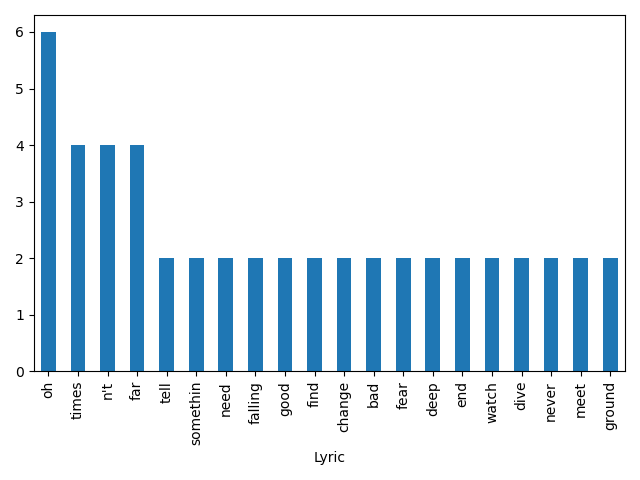

In [11]:
axis = df_lyrics.plot.bar(x='Lyric', y='Count', legend=False)
plt.gcf().tight_layout()

In [12]:
mask_image = imageio.imread('mask_circle.png')
wordcloud = WordCloud(width=500, height=500,
                     colormap='prism', mask=mask_image, background_color='white')
wordcloud = wordcloud.generate(path_text)
wordcloud = wordcloud.to_file('mask_musicnote_output.png')

<IPython.core.display.Javascript object>


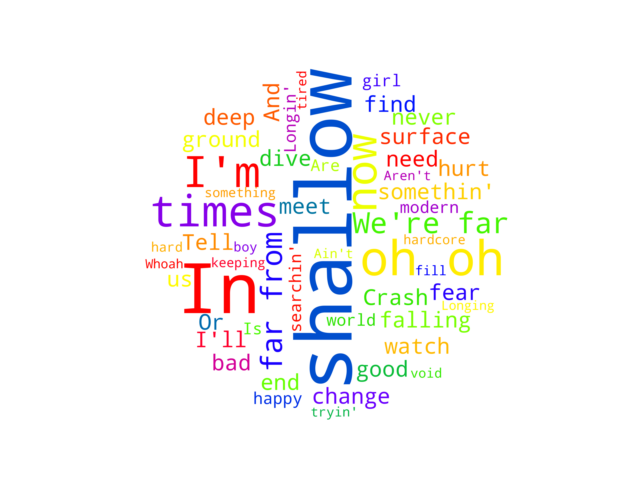

In [13]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
for char in '-.,\n':
    path_text = path_text.replace(char,"")
path_text = path_text.lower()

In [15]:
print(path_text)

tell me somethin' girlare you happy in this modern world?or do you need more?is there somethin' else you're searchin' for?i'm fallingin all the good times i find myselflongin' for changeand in the bad times i fear myselftell me something boyaren't you tired tryin' to fill that void?or do you need more?ain't it hard keeping it so hardcore?i'm fallingin all the good times i find myselflonging for a changeand in the bad times i fear myselfi'm off the deep end watch as i dive ini'll never meet the groundcrash through the surface where they can't hurt uswe're far from the shallow nowin the shallow shallowin the shallow shallowin the shallow shallowwe're far from the shallow nowoh oh oh oh oh ohwhoahi'm off the deep end watch as i dive ini'll never meet the groundcrash through the surface where they can't hurt uswe're far from the shallow nowin the shallow shallowin the shallow shallowin the shallow shallowwe're far from the shallow now


In [16]:
non_filtered_lyrics = path_text.split()
print(non_filtered_lyrics)

['tell', 'me', "somethin'", 'girlare', 'you', 'happy', 'in', 'this', 'modern', 'world?or', 'do', 'you', 'need', 'more?is', 'there', "somethin'", 'else', "you're", "searchin'", "for?i'm", 'fallingin', 'all', 'the', 'good', 'times', 'i', 'find', "myselflongin'", 'for', 'changeand', 'in', 'the', 'bad', 'times', 'i', 'fear', 'myselftell', 'me', 'something', "boyaren't", 'you', 'tired', "tryin'", 'to', 'fill', 'that', 'void?or', 'do', 'you', 'need', "more?ain't", 'it', 'hard', 'keeping', 'it', 'so', "hardcore?i'm", 'fallingin', 'all', 'the', 'good', 'times', 'i', 'find', 'myselflonging', 'for', 'a', 'changeand', 'in', 'the', 'bad', 'times', 'i', 'fear', "myselfi'm", 'off', 'the', 'deep', 'end', 'watch', 'as', 'i', 'dive', "ini'll", 'never', 'meet', 'the', 'groundcrash', 'through', 'the', 'surface', 'where', 'they', "can't", 'hurt', "uswe're", 'far', 'from', 'the', 'shallow', 'nowin', 'the', 'shallow', 'shallowin', 'the', 'shallow', 'shallowin', 'the', 'shallow', "shallowwe're", 'far', 'from

In [17]:
count = {}
for word in non_filtered_lyrics:
    count[word] = count.get(word, 0) + 1
count

{'tell': 1,
 'me': 2,
 "somethin'": 2,
 'girlare': 1,
 'you': 4,
 'happy': 1,
 'in': 3,
 'this': 1,
 'modern': 1,
 'world?or': 1,
 'do': 2,
 'need': 2,
 'more?is': 1,
 'there': 1,
 'else': 1,
 "you're": 1,
 "searchin'": 1,
 "for?i'm": 1,
 'fallingin': 2,
 'all': 2,
 'the': 20,
 'good': 2,
 'times': 4,
 'i': 6,
 'find': 2,
 "myselflongin'": 1,
 'for': 2,
 'changeand': 2,
 'bad': 2,
 'fear': 2,
 'myselftell': 1,
 'something': 1,
 "boyaren't": 1,
 'tired': 1,
 "tryin'": 1,
 'to': 1,
 'fill': 1,
 'that': 1,
 'void?or': 1,
 "more?ain't": 1,
 'it': 2,
 'hard': 1,
 'keeping': 1,
 'so': 1,
 "hardcore?i'm": 1,
 'myselflonging': 1,
 'a': 1,
 "myselfi'm": 1,
 'off': 2,
 'deep': 2,
 'end': 2,
 'watch': 2,
 'as': 2,
 'dive': 2,
 "ini'll": 2,
 'never': 2,
 'meet': 2,
 'groundcrash': 2,
 'through': 2,
 'surface': 2,
 'where': 2,
 'they': 2,
 "can't": 2,
 'hurt': 2,
 "uswe're": 2,
 'far': 4,
 'from': 4,
 'shallow': 10,
 'nowin': 2,
 'shallowin': 4,
 "shallowwe're": 2,
 'nowoh': 1,
 'oh': 4,
 "ohwhoahi

In [18]:
lyric_freq = []
for key, value in count.items():
    lyric_freq.append((key, value))
lyric_freq    

[('tell', 1),
 ('me', 2),
 ("somethin'", 2),
 ('girlare', 1),
 ('you', 4),
 ('happy', 1),
 ('in', 3),
 ('this', 1),
 ('modern', 1),
 ('world?or', 1),
 ('do', 2),
 ('need', 2),
 ('more?is', 1),
 ('there', 1),
 ('else', 1),
 ("you're", 1),
 ("searchin'", 1),
 ("for?i'm", 1),
 ('fallingin', 2),
 ('all', 2),
 ('the', 20),
 ('good', 2),
 ('times', 4),
 ('i', 6),
 ('find', 2),
 ("myselflongin'", 1),
 ('for', 2),
 ('changeand', 2),
 ('bad', 2),
 ('fear', 2),
 ('myselftell', 1),
 ('something', 1),
 ("boyaren't", 1),
 ('tired', 1),
 ("tryin'", 1),
 ('to', 1),
 ('fill', 1),
 ('that', 1),
 ('void?or', 1),
 ("more?ain't", 1),
 ('it', 2),
 ('hard', 1),
 ('keeping', 1),
 ('so', 1),
 ("hardcore?i'm", 1),
 ('myselflonging', 1),
 ('a', 1),
 ("myselfi'm", 1),
 ('off', 2),
 ('deep', 2),
 ('end', 2),
 ('watch', 2),
 ('as', 2),
 ('dive', 2),
 ("ini'll", 2),
 ('never', 2),
 ('meet', 2),
 ('groundcrash', 2),
 ('through', 2),
 ('surface', 2),
 ('where', 2),
 ('they', 2),
 ("can't", 2),
 ('hurt', 2),
 ("uswe'r

In [19]:
sorted_lyric_freq = sorted(lyric_freq, key=itemgetter(1), reverse=True)

In [20]:
top20_lyric_freq = sorted_lyric_freq[1:21]

In [21]:
top20_lyric_freq

[('shallow', 10),
 ('i', 6),
 ('you', 4),
 ('times', 4),
 ('far', 4),
 ('from', 4),
 ('shallowin', 4),
 ('oh', 4),
 ('in', 3),
 ('me', 2),
 ("somethin'", 2),
 ('do', 2),
 ('need', 2),
 ('fallingin', 2),
 ('all', 2),
 ('good', 2),
 ('find', 2),
 ('for', 2),
 ('changeand', 2),
 ('bad', 2)]

<IPython.core.display.Javascript object>


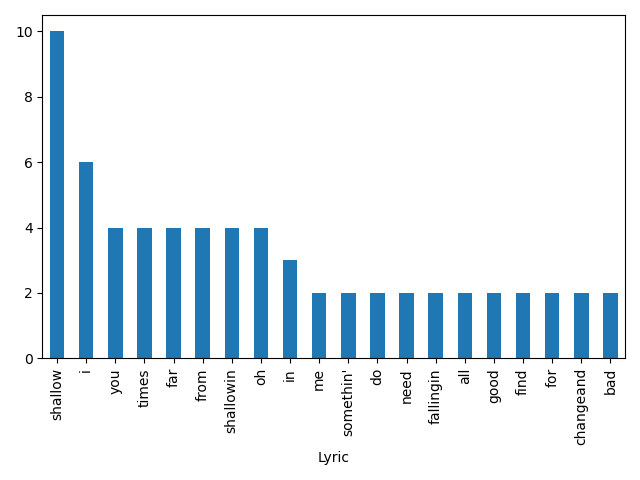

In [22]:
df_lyric_freq = pd.DataFrame(top20_lyric_freq, columns=['Lyric', 'Count'])
axis = df_lyric_freq.plot.bar(x='Lyric', y='Count', legend=False)
plt.gcf().tight_layout()